# Lesson 4: Exploratory Data Analysis (EDA)

### Activity 1: Basic Data Inspection

In [1]:
%matplotlib inline

# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from Seaborn (a built-in dataset)
df = sns.load_dataset('titanic')

# Peek at the first few rows: like reading the first few lines of code
print("-----First 5 Rows-----")
print(df.head())

# Get descriptive statistics to check variables' properties
print("-----Descriptive Statistics-----")
print(df.describe(include='all'))

# Check dataset structure and column types, like reviewing code comments
print("-----Dataset Information-----")
print(df.info())


-----First 5 Rows-----
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
-----Descriptive Statistics-----
          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique     

### Activity 2: Visualizing Distributions and Detecting Anomalies

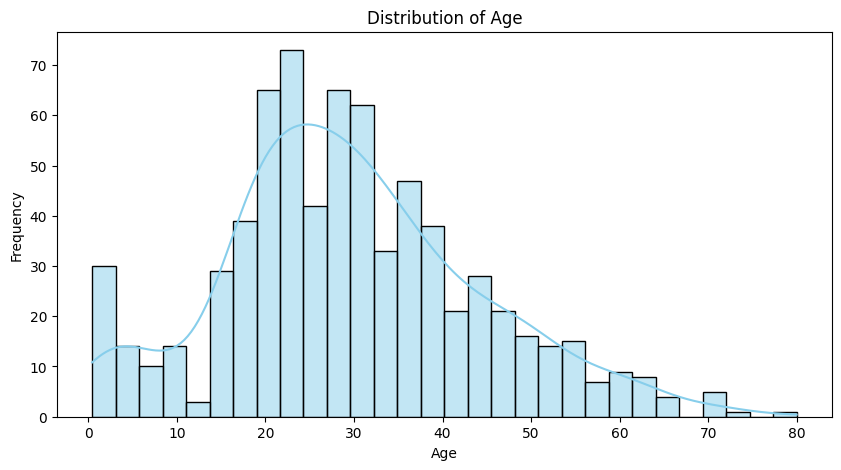

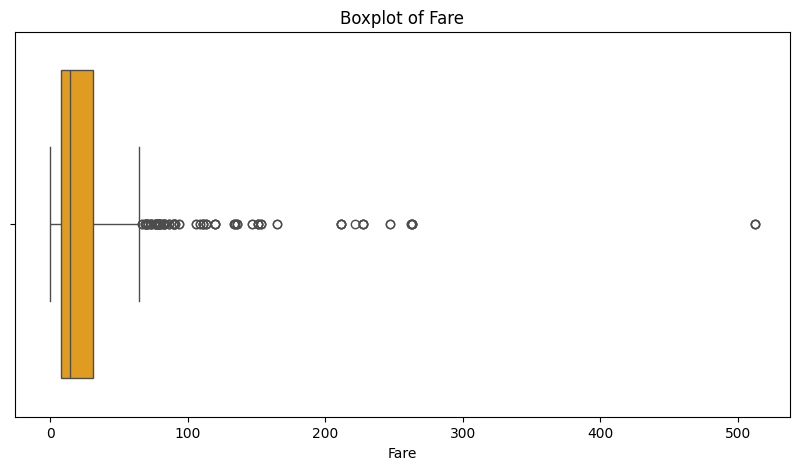

In [2]:
# Plotting the distribution of 'age' as if mapping out function runtime frequencies
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize outliers in 'fare' using a boxplot - think of these as bug reports
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['fare'], color='orange')
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()


### Activity 3: Exploring Feature Relationships with Visual Tools

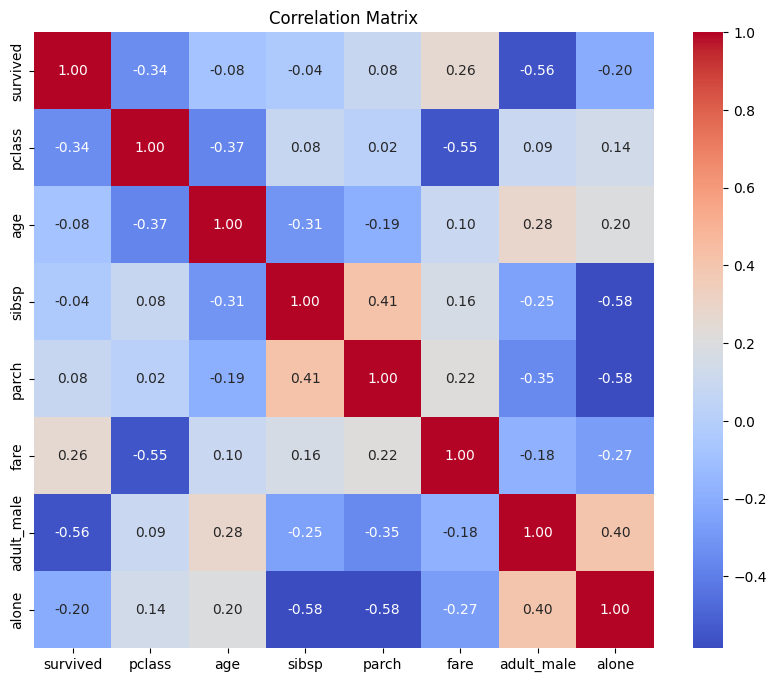

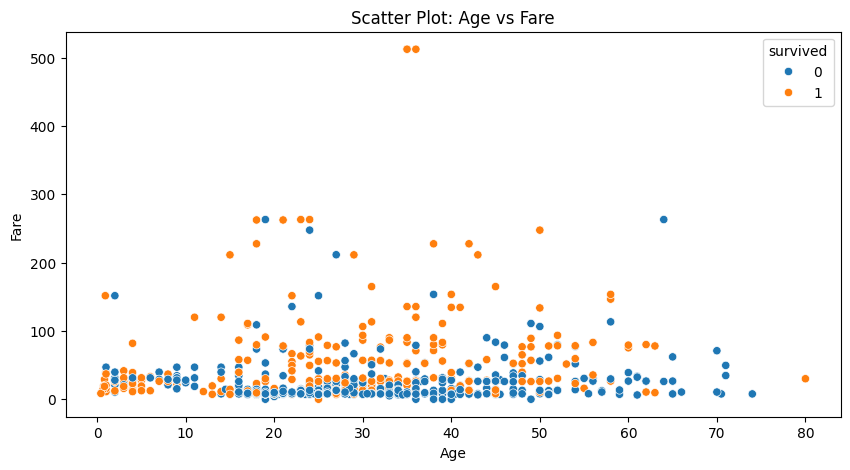

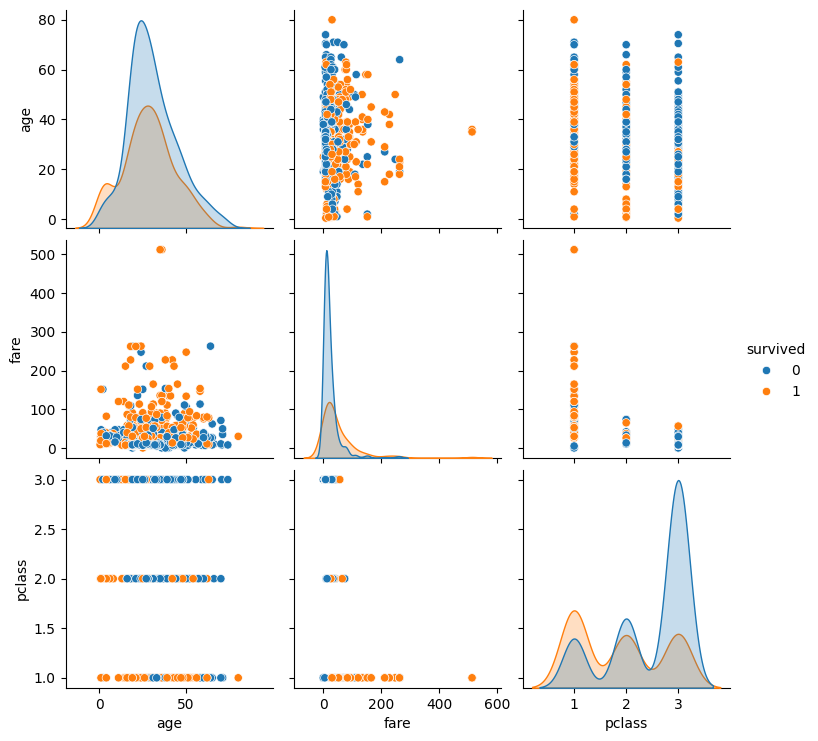

In [4]:
# Correlation heatmap to visualize relationships (like module dependency mapping)
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Scatter plot: exploring the relationship between 'age' and 'fare'
plt.figure(figsize=(10, 5))
sns.scatterplot(x='age', y='fare', data=df, hue='survived')
plt.title('Scatter Plot: Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Pairplot shows interactions between multiple features (system-level debugging)
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']].dropna(), hue='survived')
plt.show()


### Activity 4: Cleaning the Codebase (Handling Messy Data) & Drawing Insights

In [5]:
# Identify missing values similar to scanning for "TODO" markers in code
print("-----Missing Values-----")
print(df.isnull().sum())

# Fill missing 'age' values with the median, mirroring the use of default values in code fixes
df['age'] = df['age'].fillna(df['age'].median())
print("Missing values in Age after filling:", df['age'].isnull().sum())

# Now document or note down your insights:
# For example, consider how changes in 'age' values might influence 'survived' status.


-----Missing Values-----
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Missing values in Age after filling: 0


### Activity 5: Intermediate Activity – From EDA to Feature Engineering

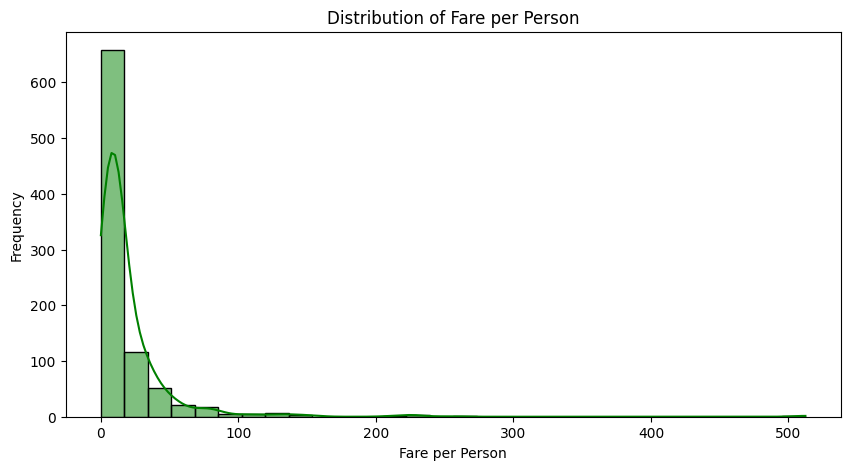

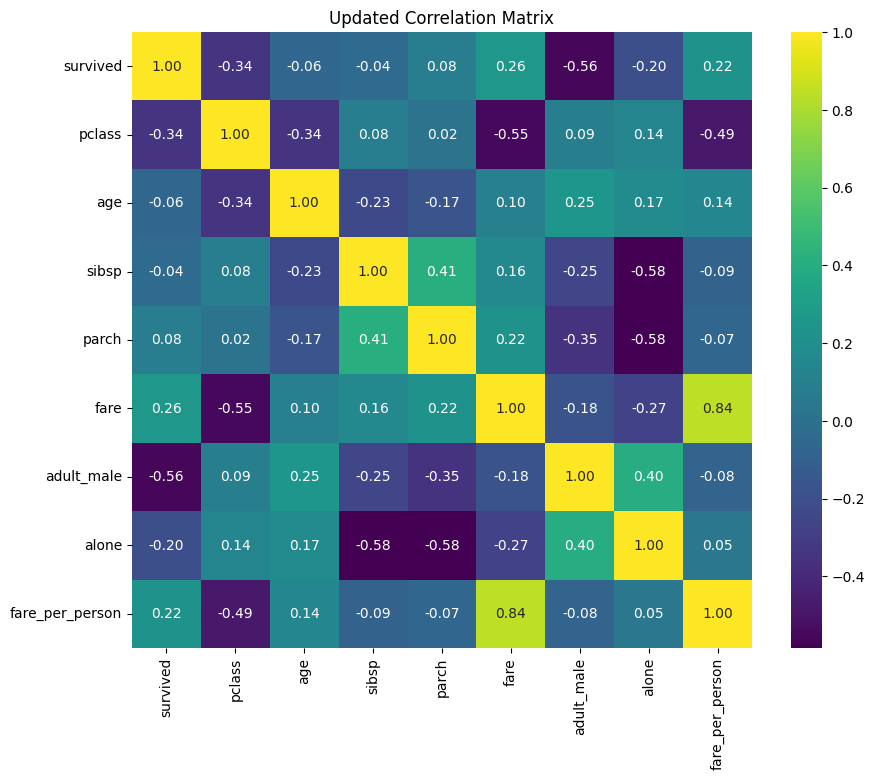

In [6]:
# Create a new feature: 'fare_per_person'
# Think of it as a refactoring step to optimize code, reducing redundancy
df['fare_per_person'] = df['fare'] / (df['sibsp'] + df['parch'] + 1)

# Visualize the distribution of the new feature
plt.figure(figsize=(10, 5))
sns.histplot(df['fare_per_person'], kde=True, color='green', bins=30)
plt.title('Distribution of Fare per Person')
plt.xlabel('Fare per Person')
plt.ylabel('Frequency')
plt.show()

# Create an updated correlation matrix after engineering the new feature
plt.figure(figsize=(10, 8))
corr_updated = df.corr(numeric_only=True)
sns.heatmap(corr_updated, annot=True, cmap='viridis', fmt=".2f")
plt.title('Updated Correlation Matrix')
plt.show()
